# Método das diferenças finitas: Convecção

Vamos resolver a equação de convecção:

$$\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0$$

## Setup

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

As células abaixo definem funções que criam o domínio e as condições iniciais.

In [15]:
def cria_dominios(tamanho, Nx, duração, Nt):
    """
    Cria o domínio espacial e calcula os intervalos de tempo e espaço.
    """
    x = np.linspace(0, tamanho, Nx)
    dx = x[1] - x[0]
    dt = duração/(Nt - 1)
    return x, dx, dt

In [16]:
x, dx, dt = cria_dominios(tamanho=2, Nx=51, duração=1, Nt=51)
print('dx =', dx, 'dt =', dt)

dx = 0.04 dt = 0.02


In [17]:
def cria_cond_inicial(x):
    """
    Cria um vetor de condições iniciais u0 com uma função degrau.
    """
    u0 = np.ones(x.size)
    u0[(x >= 0.2) & (x <= 0.5)] = 2
    return u0

(0, 3)

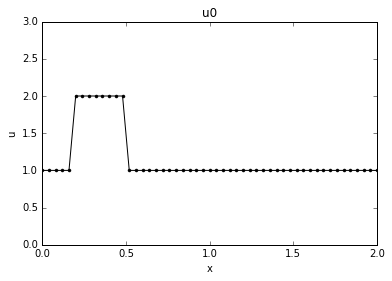

In [18]:
u0 = cria_cond_inicial(x)

plt.figure()
plt.plot(x, u0, '.-k')
plt.xlabel('x')
plt.ylabel('u')
plt.title('u0')
plt.ylim(0, 3)

## Tarefa 1

Complete a função abaixo que executa 1 único passo no tempo utilizando diferenças progressivas no tempo e regressivas no espaço.

In [19]:
def passo_no_tempo(u_passado, dx, dt, velocidade):
    u_futuro = u_passado.copy()
    Nx = len(u_passado)
    u_futuro[0]=1 #determinamos nossa condição de contorno, no caso, o valor do primero elemento do nosso dominio
    for k in range(1,Nx):
#Utilizamos o for e range para definir as posições dos elementos com base em u_passado.
#Ressaltando que começamos apartir do segundo elemento, visto que o primeiro esta dentro da condição de contorno.
        u_futuro[k] = u_passado[k]- velocidade*(dt/dx)*(u_passado[k]-u_passado[k-1]) 
        #Adequamos a função passada em aula para fazer o cálculo de cada elemento de acordo com o k (Sendo k a posição, variando com base nas posições de u_passado)  
    return u_futuro

Use as células abaixo para checar se sua função funciona.

In [20]:
u1 = passo_no_tempo(u0, dx, dt, velocidade=1)

(0, 3)

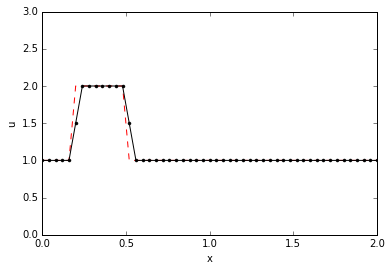

In [21]:
plt.figure()
plt.plot(x, u0, '--r')
plt.plot(x, u1, '.-k')
plt.xlabel('x')
plt.ylabel('u')
plt.ylim(0, 3)

## Tarefa 2

Complete a função abaixo que executa uma simulação completa de diferenças finitas (utilizando as funções definidas acima) para uma deterimada duração.

In [22]:
def simula(tamanho, Nx, duração, Nt, velocidade):
    x, dx, dt = cria_dominios(tamanho, Nx, duração, Nt) #acrescentamos a função que determina o dominio
    u0 = cria_cond_inicial(x) #acrescentamos a função que nos da a condição inicial
    u_passado = u0 #definimos u_passado começando da condição inicial
    for j in range(Nt): 
#para que ela funcionasse por uma determinada duração acresentamos o for e range para que a função rodasse dentro da variação de tempo
        u_futuro = passo_no_tempo(u_passado, dx, dt, velocidade) #acrescetamos a função para calcular u_futuro
        u_passado = u_futuro
#designamos que u_passado seria igual a u_futuro, assim cada vez que ele rodar usara como base u anterior e não somente o u0.
    return x, u0, u_futuro

Utilize as células abaixo para checar o resultado da sua função.

In [23]:
x, u0, u_futuro = simula(tamanho=2, Nx=51, duração=1, Nt=51, velocidade=1)

(0, 3)

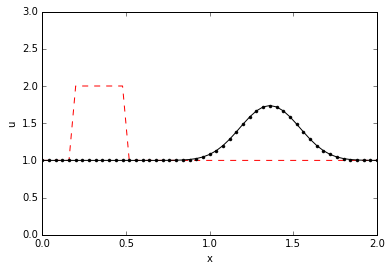

In [24]:
plt.figure()
plt.plot(x, u0, '--r')
plt.plot(x, u_futuro, '.-k')
plt.xlabel('x')
plt.ylabel('u')
plt.ylim(0, 3)

### O que aconteceu com o resultado no final da simulação? Isso deveria acontecer?

Neste caso ele foi suavizado devido ao fato de delta (x) ter valor distante de zero, mostrando um grafico diferente do esperado. Para que isso não aconteça é necessario pegar intervalos diferentes de delta(x) de acordo com o tempo.

## Tarefa 3

Faça uma figura com o resultado da simulação para diferentes valores `Nx` (utilize a lista abaixo). Inclua uma legenda no seu gráfico.

In [25]:
valores_de_Nx = [51, 71, 91, 101, 111]

(0, 3)

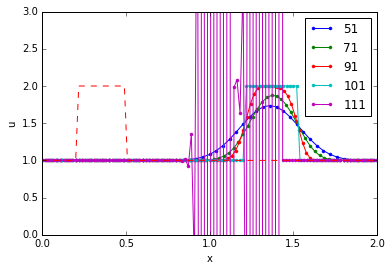

In [26]:
plt.figure() #serve para criar uma imagem vazia para receber todos os graficos juntos.
for Nx in valores_de_Nx: 
#usamos for  para variar nx, assim conseguimos criar a representação para cada u dentro do grafico.
    x, u0, u_futuro = simula(tamanho=2, Nx=Nx, duração=1, Nt=51, velocidade=1)
    plt.plot(x, u_futuro, '.-')
plt.plot(x, u0, '--r')
plt.legend(valores_de_Nx, loc=0) # com a legenda podemos localizar a u mais similar a u0
plt.xlabel('x')
plt.ylabel('u')
plt.ylim(0, 3)

### O método é igualmente preciso para todos os valores de Nx?

Não. Pois alguns intervalos de delta(x) fazem com que o grafico 'exploda' ou continue suavizado.

## Bônus

Complete a função abaixo que executa a simulação completa mas dessa vez guarda cada passo da simulação. A função deve gerar uma lista `u` que contem o valor de $u$ de cada iteração.

Complete o código que gera um gráfico com o valor de `u` a cada 10 iterações. Ou seja, o gráfico deve conter `u[0]`, `u[10]`, `u[20]`, etc.

In [40]:
def simula_grava(tamanho, Nx, duração, Nt, velocidade): #usamos as funçoes já informadas pelo professor
    x, dx, dt = cria_dominios(tamanho, Nx, duração, Nt)
    u0 = cria_cond_inicial(x)
    u_passado = u0 #consideramos u_passado começando da condição inicial
    u=[] #criamos uma lista vazia para receber nosso resultado
    for j in range(Nt): #usamos o for para variar no tempo
        u_futuro = passo_no_tempo(u_passado, dx, dt, velocidade) 
        #usamos uma função definida em uma das tarefas anteriores
        u_passado = u_futuro  
        #essa igualdade serve para que o proximo u_futuro seja de acordo com o u definido pela função passo_tempo   
        u.append(u_futuro) #salvamos os resultados na lista definida anteriormente
    return x, u

In [41]:
x, u = simula_grava(tamanho=2, Nx=51, duração=1, Nt=51, velocidade=1)

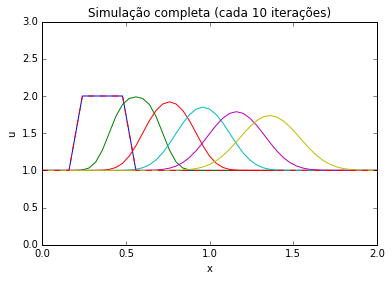

In [42]:
plt.figure() #criamos uma figura vazia para receber os graficos
for i in range(0,len(u),10):
#usamos o for, range e len para plotar somente as funçoes que queriamos.
#Começando do elemnto de indice 0 e pecorrrendo todos os elementos de u, de 10 em 10.
    plt.plot(x,u[i])
plt.plot(x,u[0], '--r')
plt.xlabel('x')
plt.ylabel('u')
plt.ylim(0, 3)
plt.title('Simulação completa (cada 10 iterações)')

Extra:

Fizemos  com o Nx, que apresentou representação grafica mais proximo do u0, observado no gráfico da tarefa 3.

In [35]:
x, u = simula_grava(tamanho=2, Nx=101, duração=1, Nt=51, velocidade=1)

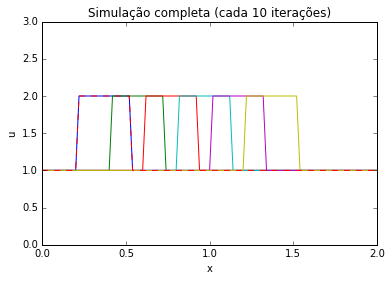

In [36]:
plt.figure()
for i in range(0,len(u),10):
    plt.plot(x,u[i],)
plt.plot(x,u[0], '--r')
plt.xlabel('x')
plt.ylabel('u')
plt.ylim(0, 3)
plt.title('Simulação completa (cada 10 iterações)')

**Course website**: https://github.com/mat-esp/about

**Note**: This notebook is part of the course "Matemática Especial I" of the [Universidade do Estado do Rio de Janeiro](http://www.uerj.br/). All content can be freely used and adapted under the terms of the 
[Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)